<a href="https://colab.research.google.com/github/AhmedBuckets/SPS602/blob/main/assignment_10_noboston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 10**

In [21]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#plotly or other graphing library
import matplotlib.pyplot as plt

In [14]:
# Load datasets here once and assign to variables iris and boston

iris = load_iris()


**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [15]:
# Create a DataFrame with feature names as column headings
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Get the first 5 rows of the DataFrame
first_5_rows = df.head(5)

# Convert target names to a Python list
target_names = list(iris.target_names)

# Print the first 5 rows of the DataFrame
print("First 5 rows of the data:")
print(first_5_rows)

# Print the target names as a list
print("Target names:")
print(target_names)

First 5 rows of the data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Target names:
['setosa', 'versicolor', 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [16]:
# Create the kNN model with neighbors=5
knn = KNN(n_neighbors=5)

# Fit the model on the iris dataset
knn.fit(iris.data, iris.target)

# New observations to predict
new_observations = [[5.1, 3.5, 1.4, 0.2], [6.2, 2.9, 4.3, 1.3], [7.3, 3.1, 6.3, 2.4]]

# Predict the categories of new observations
predictions = knn.predict(new_observations)

# Map the encoded values to target names
predicted_target_names = [iris.target_names[prediction] for prediction in predictions]

# Print the predicted target names
print("Predicted categories of new observations:")
print(predicted_target_names)

Predicted categories of new observations:
['setosa', 'versicolor', 'virginica']


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [20]:
split = 0.3
neighbors = 5

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=split, random_state=42)

# Create the KNN model with specified number of neighbors
knn = KNN(n_neighbors=neighbors)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

accuracy

1.0

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

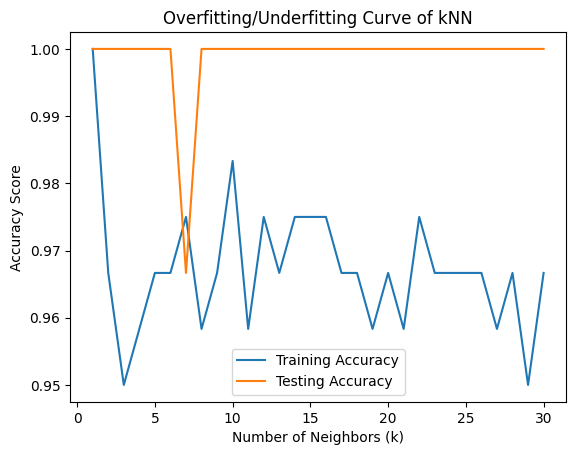

In [22]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Define the range of k values
k_values = range(1, 31)

# Initialize empty lists to store accuracy scores
train_scores = []
test_scores = []

# Iterate over different values of k
for k in k_values:
    # Create a kNN model
    knn = KNN(n_neighbors=k)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Predict the labels for training and test data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracy scores and append to the lists
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Plotting the curves
plt.plot(k_values, train_scores, label='Training Accuracy')
plt.plot(k_values, test_scores, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('Overfitting/Underfitting Curve of kNN')
plt.legend()
plt.show()